In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import scipy as sp
from scipy import interpolate
from scipy import signal

In [2]:

image_file = get_pkg_data_filename(
    "jw01247/Pandora-2/stage3/d1/Level3_prism-clear_s3d.fits")
hdul = fits.open(image_file)
#hdul.info()
qubp1 = fits.getdata(image_file, ext=1).astype(float)
image_file = get_pkg_data_filename(
    "jw01247/Pandora-2/stage3/d1/Level3_prism-clear_x1d.fits")
hdul = fits.open(image_file)
x=hdul[1].data
wavep1=x['wavelength']
image_file = get_pkg_data_filename(
    "jw01247/Pandora-2/stage3/d2/Level3_prism-clear_s3d.fits")
hdul = fits.open(image_file)
#hdul.info()
qubp2 = fits.getdata(image_file, ext=1).astype(float)
hdr=hdul[1].header
#print(hdr)
area=hdr['PIXAR_SR']
print(area)
image_file = get_pkg_data_filename(
    "jw01247/Pandora-2/stage3/d2/Level3_prism-clear_x1d.fits")
hdul = fits.open(image_file)
x=hdul[1].data
wavep2=x['wavelength']


2.35040007004737e-13


In [3]:
nim=np.median(qubp2[(wavep2>3.5) & (wavep2<3.6),:,:], axis=0)
mnim=np.median(nim)
nthr=1.5e-9
specr=np.zeros(972)
spece=np.zeros(972)

for i in range(0,972):
    dat=qubp2[i,0:50,0:50]
    foo=np.isfinite(dat)
    dx=dat[foo & (nim>nthr)]#/nim[foo & (nim>nthr)]
    dy=dat[foo & (nim>nthr)]/nim[foo & (nim>nthr)]
    mdx=np.median(dx)
    sdx=np.std(dx)
    specr[i]=np.mean(dx[np.abs(dx-mdx)<5*sdx])
    spece[i]=np.std(dy[np.abs(dx-mdx)<5*sdx])/np.sqrt(len(dy[np.abs(dx-mdx)<5*sdx])-1)*specr[i]
    
    

/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_81830/1739400836

In [4]:

def solfluxave (waves):
    image_file = get_pkg_data_filename("solar_spec.fits")
    hdul = fits.open(image_file)
    dat = fits.getdata(image_file, ext=1)
    dat.dtype
    wave=dat['wavelength'].astype(float)
    wavex=wave/1e4
    flux=dat['flux'].astype(float)
    fr=interpolate.interp1d(wavex,flux, fill_value='extrapolate')
    nw=np.shape(waves)[0]
    output=np.zeros(nw)
    for i in range(nw):
       # print(i)
        if ((i>0) & (i<(nw-1))):
            wr=np.linspace(waves[i-1],waves[i+1],40)
        #    print(wr)
        if i==0:
            wr=np.linspace(2*waves[0]-waves[1],waves[1],40)
         #   print(wr)
        if i==(nw-1):
            wr=np.linspace(waves[nw-1],2*waves[nw-1]+waves[nw-2],40)
          #  print(wr)
        sf=fr(wr)
        output[i]=np.mean(sf[10:31])
    return(output)

#plt.plot(solflux)



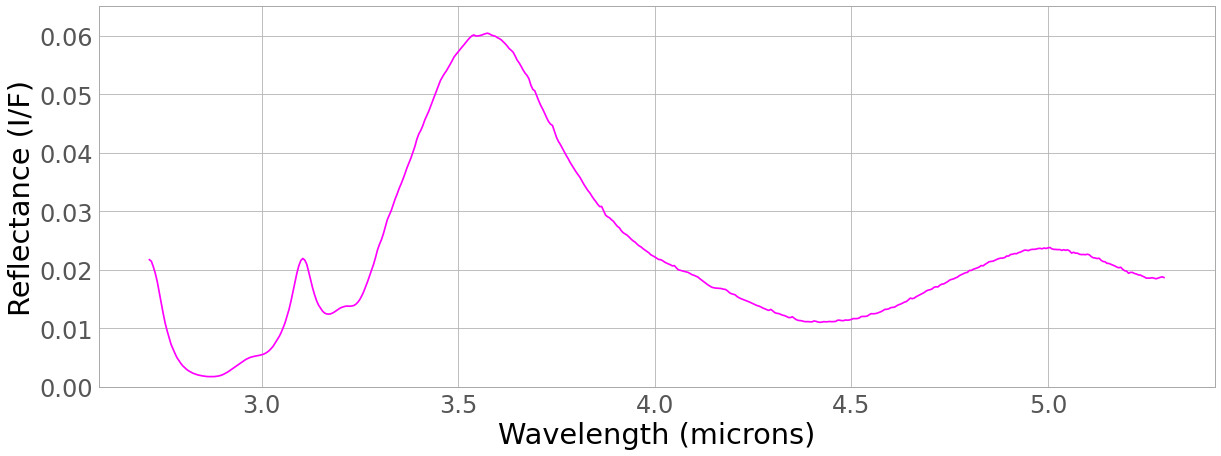

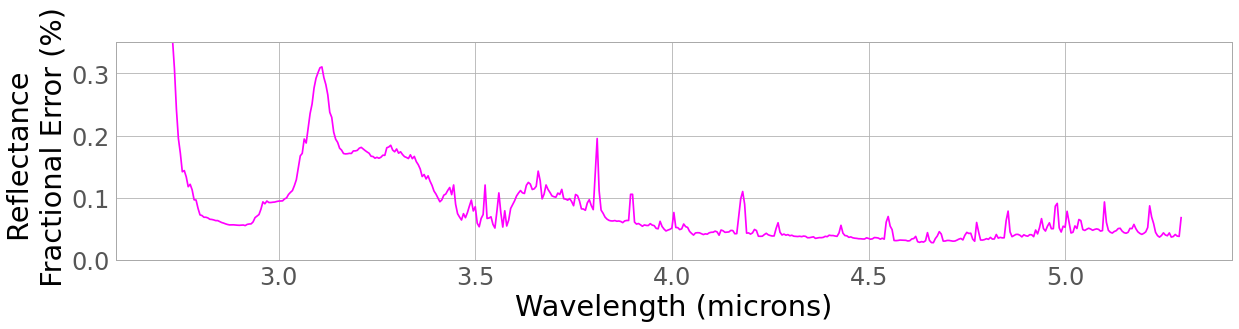

In [5]:
sundist=1473e6
waves=wavep2
solflux=solfluxave(waves)*waves**2/(sundist/1.496e8)**2/3/np.pi*1e7
solflux2=solfluxave(waves*(1-5.7e-5))*waves**2/(sundist/1.496e8)**2/3/np.pi*1e7
specrn=specr/solflux/area
specen=spece/solflux/area
foo=(waves>2.71)

plt.figure(figsize=[20,7])
plt.rcParams['font.size'] = 24
plt.plot(waves[foo],specrn[foo],'magenta')
plt.ylabel('Reflectance (I/F)')
plt.xlabel('Wavelength (microns)')
plt.ylim([0,0.065])
plt.show()
plt.rcParams['font.size'] = 12
plt.figure(figsize=[20,4])
plt.rcParams['font.size'] = 24
plt.plot(waves[foo],specen[foo]/specrn[foo]*100,'magenta')
plt.ylabel('Reflectance \n Fractional Error (%)')
plt.xlabel('Wavelength (microns)')
plt.ylim([0,0.35])
plt.show()
plt.rcParams['font.size'] = 12



In [6]:
image_file='jw01128-SNAP2/jw01128-o002_t016_nirspec_prism-clear_s3d.fits'
hdul = fits.open(image_file)
hdr=hdul[1].header
    #print(hdr)
area=hdr['PIXAR_SR']
nwave=hdr['NAXIS3']
wave0=hdr['CRVAL3']
dwave=hdr['CDELT3']
wavesn=np.linspace(wave0,wave0+nwave*dwave,nwave)
qub = fits.getdata(image_file, ext=1).astype(float)
specsn=np.mean(np.mean(qub[:,25:35,25:35],axis=1),axis=1)
foosn=(wavesn>2.7) & (wavesn<5.2)
foor=(waves>2.705) & (waves<5.2)
specrn2=specr[foor]/specsn[foosn]
wavessn=waves[foor]

In [7]:

def quadfilt(wave,dat,range1,range2, range3):
    nnx=np.size(wave)
    out=np.zeros(nnx)
    for i in range(nnx):
        foo=(np.abs(wave-wave[i])>range1) & (np.abs(wave-wave[i])<range2) & (np.abs(wave-4.15)>range3)
        a,b,c=np.polyfit(wave[foo],dat[foo],2)
        out[i]=dat[i]/(c+b*wave[i]+a*wave[i]**2)
    return out


def cubfilt(wave,dat,range1,range2,range3):
    nnx=np.size(wave)
    out=np.zeros(nnx)
    for i in range(nnx):
        foo=(np.abs(wave-wave[i])>range1) & (np.abs(wave-wave[i])<range2) & (np.abs(wave-4.15)>range3)
        a,b,c,d=np.polyfit(wave[foo],dat[foo],3)
        out[i]=dat[i]/(d+c*wave[i]+b*wave[i]**2+a*wave[i]**3)
    return out

def quarfilt(wave,dat,range1,range2,range3):
    nnx=np.size(wave)
    out=np.zeros(nnx)
    for i in range(nnx):
        foo=(np.abs(wave-wave[i])>range1) & (np.abs(wave-wave[i])<range2) & (np.abs(wave-4.15)>range3)
        a,b,c,d,e=np.polyfit(wave[foo],dat[foo],4)
        out[i]=dat[i]/(e+d*wave[i]+c*wave[i]**2+b*wave[i]**3+a*wave[i]**4)
    return out

def quinfilt(wave,dat,range1,range2,range3):
    nnx=np.size(wave)
    out=np.zeros(nnx)
    for i in range(nnx):
        foo=(np.abs(wave-wave[i])>range1) & (np.abs(wave-wave[i])<range2) & (np.abs(wave-4.15)>range3)
        a,b,c,d,e,f=np.polyfit(wave[foo],dat[foo],5)
        out[i]=dat[i]/(f+e*wave[i]+d*wave[i]**2+c*wave[i]**3+b*wave[i]**4+a*wave[i]**5)
    return out

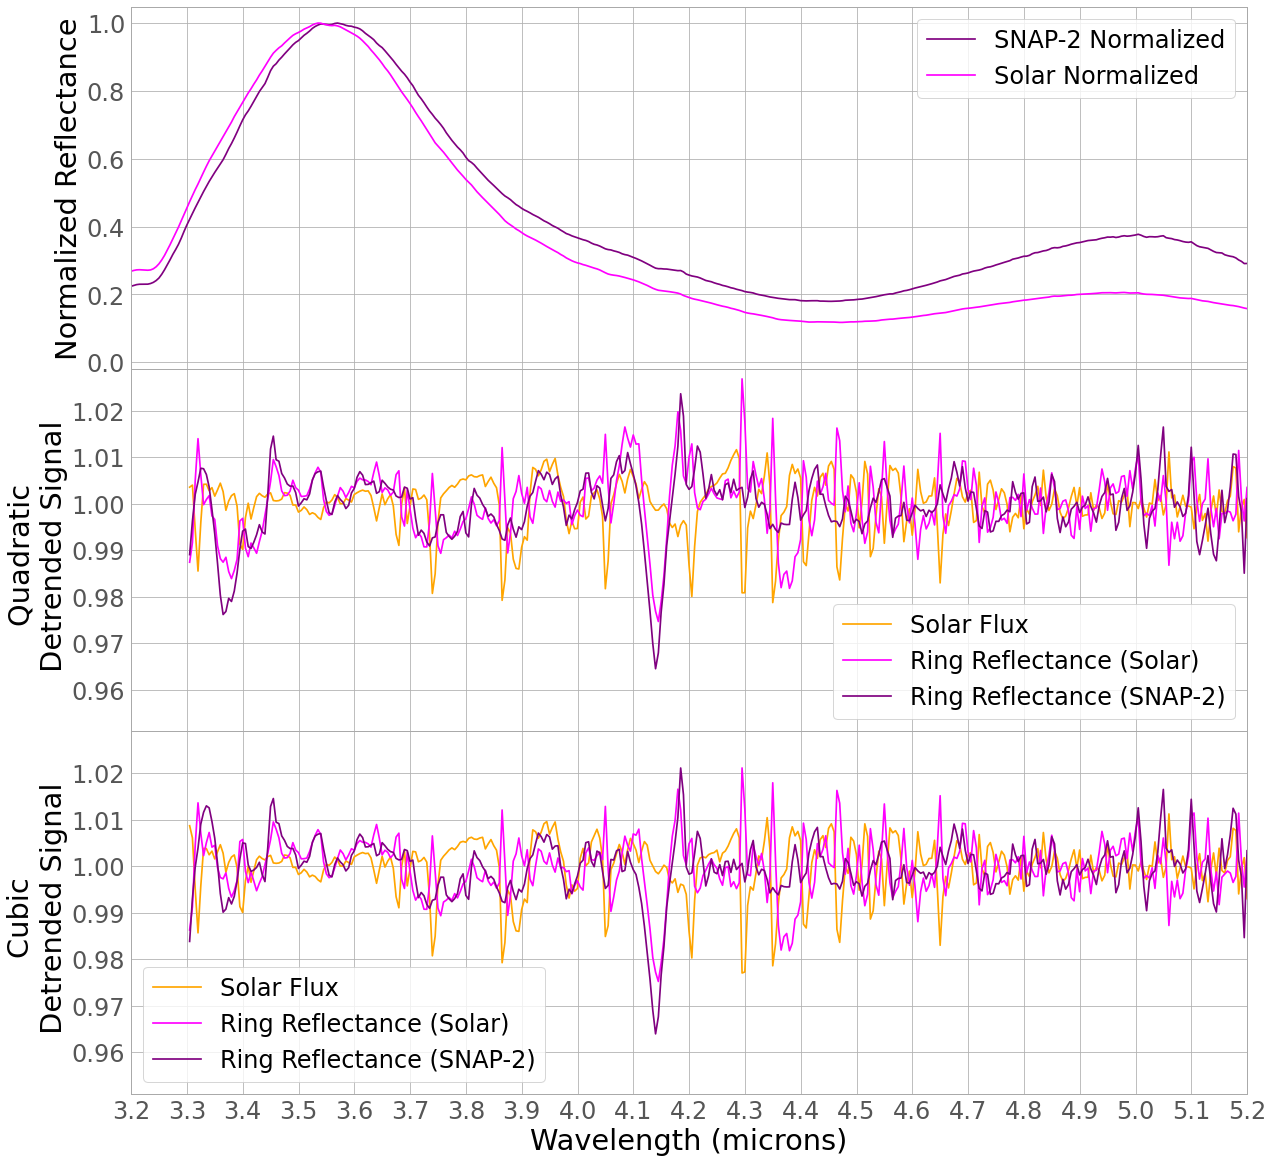

In [8]:

fig=plt.figure(figsize=[20,20])
plt.rcParams['font.size'] = 24
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True)

axs[0].plot(wavessn,specrn2/np.max(specrn2),'purple', label='SNAP-2 Normalized')
foox=wavep2>2.72
axs[0].plot(wavep2[foox],specr[foox]/np.nanmax(specr[foox]),'magenta', label='Solar Normalized')
plt.xticks([3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2])
axs[0].set_ylabel('Normalized Reflectance')
#plt.xlabel('Wavelength (microns)')
#plt.xlim([3.2,5.2])
axs[0].legend()
#plt.show()
#plt.figure(figsize=[20,7])
foox=(wavep2>3.3) & (wavep2<5.2)
axs[1].plot(wavep2[foox],quadfilt(wavep2[foox],solflux2[foox],0.0,.15,.05), 'orange', label='Solar Flux')
axs[1].plot(wavep2[foox],quadfilt(wavep2[foox],specrn[foox],0.0,.15,.05), 'magenta', label='Ring Reflectance (Solar)')

foox=(wavessn>3.3) & (wavessn<5.2)
axs[1].plot(wavessn[foox],quadfilt(wavessn[foox],specrn2[foox],0.0,.15,.05), 'purple', label='Ring Reflectance (SNAP-2)')
#plt.xlim([3.2,5.2])
axs[1].set_ylim([.951,1.029])
axs[1].set_ylabel('Quadratic \n Detrended Signal')
axs[1].legend()
#plt.xlabel('Wavelength (microns)')
#plt.show()
#plt.figure(figsize=[20,7])
foox=(wavep2>3.3) & (wavep2<5.2)
axs[2].plot(wavep2[foox],cubfilt(wavep2[foox],solflux2[foox],0.0,.15,.05), 'orange', label='Solar Flux')
axs[2].plot(wavep2[foox],cubfilt(wavep2[foox],specrn[foox],0.0,.15,.05), 'magenta', label='Ring Reflectance (Solar)')

foox=(wavessn>3.3) & (wavessn<5.2)
axs[2].plot(wavessn[foox],cubfilt(wavessn[foox],specrn2[foox],0.0,.15,.05), 'purple', label='Ring Reflectance (SNAP-2)')
plt.xticks([3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2])
plt.xlim([3.2,5.2])
axs[2].set_ylim([.951,1.029])
axs[2].set_ylabel('Cubic \n Detrended Signal')
axs[2].legend()
plt.xlabel('Wavelength (microns)')
#plt.show()
plt.rcParams['font.size'] = 12

In [11]:
foo=(waves>2.71) & (waves<5.299)
wavex=waves[foo]
specrx=specr[foo]/area
lw=len(wavex)
import csv
with open('JW1247_NIRSpec_Ringflux.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Wavelength'] + ['Average Ring Flux (MJy/sr)'])
    for i in range(lw):
        writer.writerow([wavex[i]]+[specrx[i]])